<a href="https://colab.research.google.com/github/sidra007/f.chollet_practice/blob/main/Weight_Height_Regression_cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COST FUNCTION**

IMPORTING LIBRARIES

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


IF USING COLAB,THEN ADD THIS CELL BUT IF USING NOTEBOOK,NO NEED OF THIS CELL
IT IS USED FOR UPLOADING DATA 

In [2]:
import io
from google.colab import files
uploaded= files.upload()

Saving weight-height.csv to weight-height.csv


READING DATA AND DISPLAING

In [4]:
df=pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


1.   EXTRACTING COLUMN 'HEIGHT' AS INPUT 'X'
2.   EXTRACTING COLUMN 'WEIGHT' AS INPUT 'y_true'



In [5]:
X=df[['Height']].values
y_true=df[['Height']].values

DEFINING 2 FUNCTIONS HERE 
1.   LINE EQUATION w*x+b
2.   MEAN SQUARE ERROR 



In [6]:
def line (x,w=0,b=0):
  return w*x+b

def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

PLOTTING 2 GRAPHS HERE:

1.   WEIGHT VS HEIGHT
2.   COST FUNCTION



Text(0.5, 0, 'b')

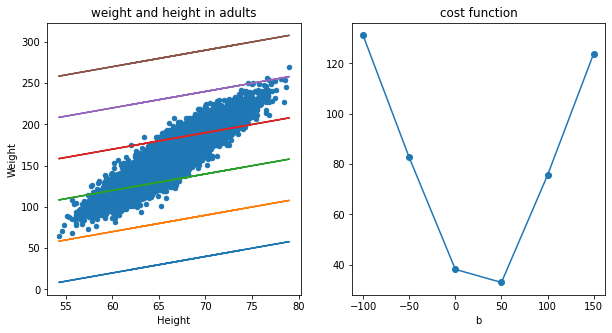

In [34]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='weight and height in adults',ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred=line(X,w=2,b=b)
  mse=mean_squared_error(y_true,y_pred)
  mses.append(mse)
  plt.plot(X,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost function')
plt.xlabel('b')


## **LINEAR REGRESSION**

IMPORTING LIBRARIES

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



UPLOADING DATA ON GOOLGE COLAB,THIS CELL IS USED ONLY IF USING COLAB

In [17]:
from google.colab import files
uploaded = files.upload() 


Saving weight-height.csv to weight-height (1).csv


READING DATA 

In [19]:
import io
df= pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


1.   EXTRACTING COLUMN 'HEIGHT' AS INPUT 'X'
2.   EXTRACTING COLUMN 'WEIGHT' AS INPUT 'y_true'


In [20]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [21]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [22]:
X.shape

(10000, 1)

DEFINING MODEL ARCHITECTURE

In [23]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


COMPLILING MODEL

In [25]:
model.compile(Adam(lr=0.8),'mean_squared_error')

FITTING MODEL

In [26]:
model.fit(X,y_true,epochs=20)


Epoch 1/20
313/313 [==============================] - 1s 778us/step - loss: 4079.5610
Epoch 2/20
313/313 [==============================] - 0s 753us/step - loss: 576.7223
Epoch 3/20
313/313 [==============================] - 0s 745us/step - loss: 541.8780
Epoch 4/20
313/313 [==============================] - 0s 764us/step - loss: 490.2362
Epoch 5/20
313/313 [==============================] - 0s 758us/step - loss: 457.8441
Epoch 6/20
313/313 [==============================] - 0s 786us/step - loss: 462.9111
Epoch 7/20
313/313 [==============================] - 0s 754us/step - loss: 409.3771
Epoch 8/20
313/313 [==============================] - 0s 798us/step - loss: 357.1441
Epoch 9/20
313/313 [==============================] - 0s 755us/step - loss: 357.5737
Epoch 10/20
313/313 [==============================] - 0s 794us/step - loss: 301.8313
Epoch 11/20
313/313 [==============================] - 0s 835us/step - loss: 286.2237
Epoch 12/20
313/313 [==============================] - 0s 862u

MODEL PREDICTION

In [27]:
y_pred=model.predict(X)

In [28]:
y_pred

array([[215.86261],
       [180.23206],
       [217.71338],
       ...,
       [145.66504],
       [182.00711],
       [132.13242]], dtype=float32)

PLOTTING LINEAR REGRESSION 

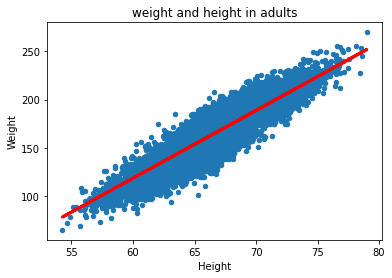

In [29]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='weight and height in adults')
plt.plot(X,y_pred,color='red',linewidth=3)

GETTING VALUES OF WEIGHTS "w" AND HEIGHTS "h"

In [30]:
w,b=model.get_weights()

In [31]:
w

array([[7.034515]], dtype=float32)

In [32]:
b

array([-303.6153], dtype=float32)

PREDICTION

In [35]:
model.predict([[200]])

array([[1103.2876]], dtype=float32)